# Hyperopt-Sklearn on Iris

`Iris` is a small data set of 150 examples of flower attributes and types of Iris.

The small size of Iris means that hyperparameter optimization takes just a few seconds.
On the other hand, Iris is so *easy* that we'll typically see numerous near-perfect models within the first few random guesses; hyperparameter optimization algorithms are hardly necessary at all.

Nevertheless, here is how to use hyperopt-sklearn (`hpsklearn`) to find a good model of the Iris data set. The code walk-through is given in 5 steps:

  1. module imports
  2. data preparation into training and testing sets for a single fold of cross-validation.
  3. creation of a hpsklearn `HyperoptEstimator`
  4. a somewhat spelled-out version of `HyperoptEstimator.fit`
  5. inspecting and testing the best model

In [1]:
# IMPORTS
import numpy as np
import skdata.iris.view
import hyperopt.tpe
import hpsklearn
import hpsklearn.demo_support
import time

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


/Applications/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Applications/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# PREPARE TRAINING AND TEST DATA
data_view = skdata.iris.view.KfoldClassification(4)
attrs = 'petal_length', 'petal_width', 'sepal_length', 'sepal_width'
labels = 'setosa', 'versicolor', 'virginica'
X_all = np.asarray([map(d.__getitem__, attrs) for d in data_view.dataset.meta])
y_all = np.asarray([labels.index(d['name']) for d in data_view.dataset.meta])
idx_all = np.random.RandomState(1).permutation(len(y_all))
idx_train = idx_all[:int(.8 * len(y_all))]
idx_test = idx_all[int(.8 *  len(y_all)):]

# TRAIN AND TEST DATA
X_train = X_all[idx_train]
y_train = y_all[idx_train]
X_test = X_all[idx_test]
y_test = y_all[idx_test]

NotADirectoryError: [Errno 20] Not a directory: '/Applications/anaconda/lib/python3.5/site-packages/skdata-0.0.4-py3.5.egg/skdata/iris/iris.csv'

In [3]:
estimator = hpsklearn.HyperoptEstimator(
    preprocessing=hpsklearn.components.any_preprocessing('pp'),
    classifier=hpsklearn.components.any_classifier('clf'),
    algo=hyperopt.tpe.suggest,
    trial_timeout=15.0, # seconds
    max_evals=15,
    )

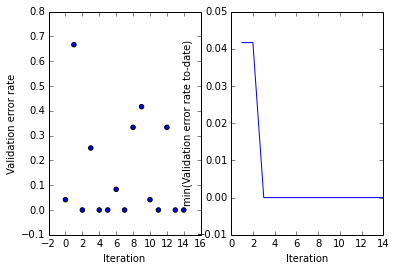

In [4]:
# Demo version of estimator.fit()
fit_iterator = estimator.fit_iter(X_train,y_train)
fit_iterator.next()
plot_helper = hpsklearn.demo_support.PlotHelper(estimator,
                                                mintodate_ylim=(-.01, .05))
while len(estimator.trials.trials) < estimator.max_evals:
    fit_iterator.send(1) # -- try one more model
    plot_helper.post_iter()
plot_helper.post_loop()

# -- Model selection was done on a subset of the training data.
# -- Now that we've picked a model, train on all training data.
estimator.retrain_best_model_on_full_data(X_train, y_train)

In [5]:
print 'Best preprocessing pipeline:'
for pp in estimator._best_preprocs:
    print pp
print
print 'Best classifier:\n', estimator._best_classif
test_predictions = estimator.predict(X_test)
acc_in_percent = 100 * np.mean(test_predictions == y_test)
print
print 'Prediction accuracy in generalization is %.1f%%' % acc_in_percent

Best preprocessing pipeline:
PCA(copy=True, n_components=4, whiten=False)

Best classifier:
KNeighborsClassifier(algorithm=auto, leaf_size=72, metric=euclidean,
           n_neighbors=29, p=2, weights=uniform)

Prediction accuracy in generalization is 96.7%
